In [ ]:
pip install numpy==1.24.0


In [9]:
#Importing different libraries for:
#Data preparation
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Data preprocessing
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,classification_report,accuracy_score,mean_squared_error

In [35]:
data = pd.read_csv("IST_data.csv")
data.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,17,D,M,69,Y,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,10,F,M,76,Y,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,43,F,F,71,N,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,6,F,M,81,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,20,F,M,78,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Extraction of the needed column
ex_data = data[["SEX","AGE","RSBP","RVISINF","RDEF1","RDEF2","RDEF3","RDEF4","RDEF5","RDEF6","RDEF7","STYPE","DDIAGISC",
                "DDIAGHA","DDIAGUN","DNOSTRK"]]
ex_data.rename(columns = {"RSBP": "BP",
                         "RVISINF": "INFARCTION",
                         "RDEF1": "Face_deficit".upper(),
                         "RDEF2": "Arm_deficit".upper(),
                         "RDEF3": "Leg_deficit".upper(),
                         "RDEF4": "Dysphasia".upper(),
                         "RDEF5": "Hemianopia".upper(),
                         "RDEF6": "VS_disorder".upper(),
                         "RDEF7": "cerebellar_signs".upper(),
                         "STYPE": "Stroke_type".upper(),
                         "DDIAGHA": "Haemorrhagic_diag".upper(),
                          "DDIAGISC": "ischemic_diag".upper(),
                          "DDIAGUN": "Indeterminate_diag".upper(),
                         "DNOSTRK": "Stroke".upper()}, inplace = True)
ex_data.head()


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEX,AGE,BP,INFARCTION,FACE_DEFICIT,ARM_DEFICIT,LEG_DEFICIT,DYSPHASIA,HEMIANOPIA,VS_DISORDER,CEREBELLAR_SIGNS,STROKE_TYPE,ISCHEMIC_DIAG,HAEMORRHAGIC_DIAG,INDETERMINATE_DIAG,STROKE
0,M,69,140,Y,N,N,N,Y,N,Y,N,PACS,Y,N,N,N
1,M,76,150,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N
2,F,71,170,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N
3,M,81,170,N,N,N,N,Y,N,N,N,PACS,Y,N,N,N
4,M,78,170,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N


In [37]:
ex_data.isnull().sum()

SEX                    0
AGE                    0
BP                     0
INFARCTION             0
FACE_DEFICIT           0
ARM_DEFICIT            0
LEG_DEFICIT            0
DYSPHASIA              0
HEMIANOPIA             0
VS_DISORDER            0
CEREBELLAR_SIGNS       0
STROKE_TYPE            0
ISCHEMIC_DIAG         23
HAEMORRHAGIC_DIAG     26
INDETERMINATE_DIAG    23
STROKE                26
dtype: int64

In [38]:
ex_data.dropna(inplace = True)
ex_data.isnull().sum()

<ipython-input-38-0dbc1c8a42fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data.dropna(inplace = True)


SEX                   0
AGE                   0
BP                    0
INFARCTION            0
FACE_DEFICIT          0
ARM_DEFICIT           0
LEG_DEFICIT           0
DYSPHASIA             0
HEMIANOPIA            0
VS_DISORDER           0
CEREBELLAR_SIGNS      0
STROKE_TYPE           0
ISCHEMIC_DIAG         0
HAEMORRHAGIC_DIAG     0
INDETERMINATE_DIAG    0
STROKE                0
dtype: int64

In [39]:
ex_data.columns

Index(['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS', 'STROKE_TYPE', 'ISCHEMIC_DIAG', 'HAEMORRHAGIC_DIAG',
       'INDETERMINATE_DIAG', 'STROKE'],
      dtype='object')

In [40]:
#Replacing yes and no with 1s and Os
ex_data[['INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS']]=ex_data[['INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT','LEG_DEFICIT', 
                                     'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER','CEREBELLAR_SIGNS']].replace({"Y":2,
                                                                                                        "N":1,
                                                                                                         "C":0})

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [41]:
ex_data["STROKE"].replace({"N":1,
                           "Y":0}, inplace = True)
ex_data["SEX"].replace({"M":0,
                       "F":1},inplace=True)
len(ex_data)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


19402

In [42]:
ex_data["STROKE_TYPE"] = ex_data["STROKE_TYPE"].replace({'PACS':1, 'LACS':2, 'POCS':3, 'OTH':4, 'TACS':5})

ex_data[["HAEMORRHAGIC_DIAG","INDETERMINATE_DIAG"]] = ex_data[["HAEMORRHAGIC_DIAG","INDETERMINATE_DIAG"]].replace({"N":0,"Y":1})

#Remove unknown stroke status
ex_data = ex_data[ex_data["STROKE"]!= "U"]

ex_data["ISCHEMIC_DIAG"].replace({"N":0,"Y":1,"U":2,"u":2}, inplace = True)

<ipython-input-42-e4dac4ba6966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data["STROKE_TYPE"] = ex_data["STROKE_TYPE"].replace({'PACS':1, 'LACS':2, 'POCS':3, 'OTH':4, 'TACS':5})


In [43]:
ex_data['STROKE'].value_counts()

1    18976
0      420
Name: STROKE, dtype: int64

In [44]:
for col in ex_data.columns:
    print(ex_data[col].value_counts())


0    10383
1     9013
Name: SEX, dtype: int64
74    811
75    726
81    705
80    701
73    700
     ... 
20      2
24      1
19      1
21      1
99      1
Name: AGE, Length: 82, dtype: int64
160    2479
150    2333
140    2247
180    1884
170    1884
       ... 
75        1
246       1
179       1
258       1
255       1
Name: BP, Length: 162, dtype: int64
1    12998
2     6398
Name: INFARCTION, dtype: int64
2    14073
1     5076
0      247
Name: FACE_DEFICIT, dtype: int64
2    16609
1     2664
0      123
Name: ARM_DEFICIT, dtype: int64
2    14644
1     4497
0      255
Name: LEG_DEFICIT, dtype: int64
1    10318
2     8495
0      583
Name: DYSPHASIA, dtype: int64
1    12367
0     3936
2     3093
Name: HEMIANOPIA, dtype: int64
1    12782
0     3445
2     3169
Name: VS_DISORDER, dtype: int64
1    15674
2     2133
0     1589
Name: CEREBELLAR_SIGNS, dtype: int64
1    7842
2    4645
5    4630
3    2222
4      57
Name: STROKE_TYPE, dtype: int64
1    17389
0     1994
2       13
Name: ISCHEMIC

<AxesSubplot:>

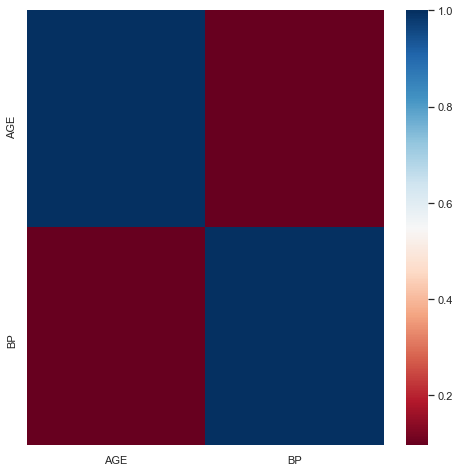

In [45]:
plt.figure(figsize = (8,8))
correlation = ex_data[["AGE","BP","STROKE"]].corr(method = 'pearson')
sns.heatmap(correlation,
           cmap = "RdBu")

In [46]:
#Chi-square for correlation in the categorical data
cat_data = ex_data[['SEX','INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS', 'STROKE_TYPE', 'ISCHEMIC_DIAG', 'HAEMORRHAGIC_DIAG',
       'INDETERMINATE_DIAG', 'STROKE']]
correlation = pd.DataFrame(data=[(0 for i in range(len(cat_data.columns))) for i in range(len(cat_data.columns))], 
                         columns=list(cat_data.columns))
correlation.set_index(pd.Index(list(cat_data.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(cat_data.columns):
    for j in list(cat_data.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(cat_data[i].astype("float64")).reshape(-1, 1),
                                   np.array(cat_data[j].astype("float64")).reshape(-1, 1))
            correlation.loc[i,j] = p_val


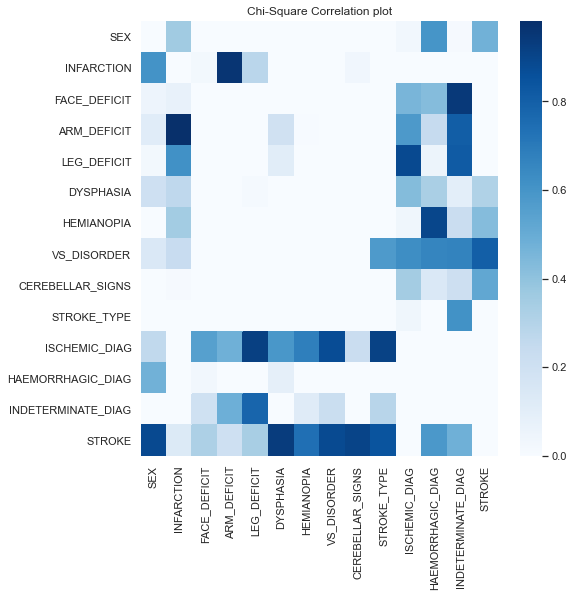

In [47]:
# Plotting a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cmap='Blues')
plt.title('Chi-Square Correlation plot')
plt.show()

In [48]:
ex_data.columns

Index(['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS', 'STROKE_TYPE', 'ISCHEMIC_DIAG', 'HAEMORRHAGIC_DIAG',
       'INDETERMINATE_DIAG', 'STROKE'],
      dtype='object')

In [49]:
len(ex_data)

19396

In [50]:
#Feature selection
X = ex_data[['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS']].astype("float64")
y = ex_data['STROKE'].astype("category")

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 45)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

15516
3880
15516
3880


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Classes in the training set before balancing')

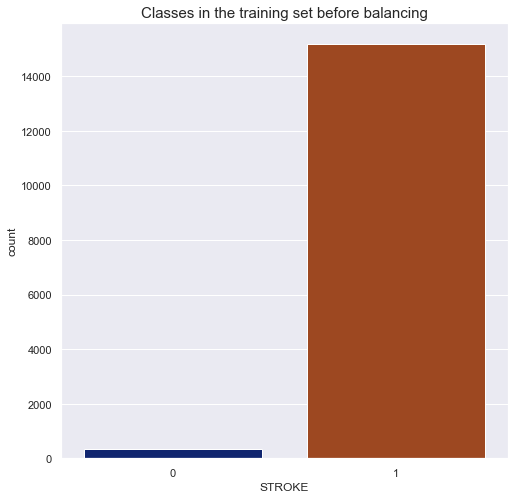

In [52]:
#classes after data balancing
plt.figure(figsize = (8,8))
sns.countplot(y_train,
             palette = "dark")
plt.title("Classes in the training set before balancing",
         fontdict={"fontsize":15})

In [53]:
#data balancing
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
len(X_train_smote)

30358

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Classes in the training set after balancing')

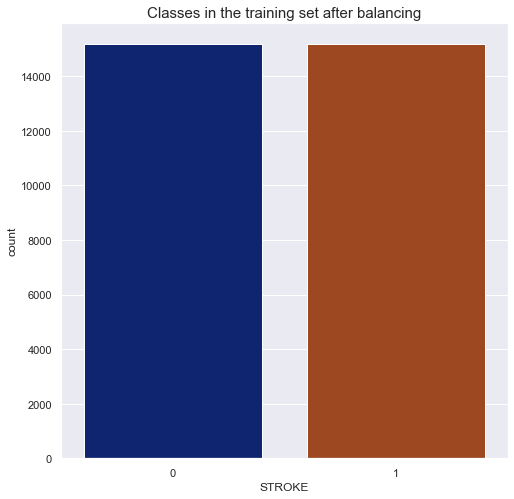

In [54]:
#classes after data balancing
plt.figure(figsize = (8,8))
sns.countplot(y_train_smote,
             palette = "dark")
plt.title("Classes in the training set after balancing",
         fontdict={"fontsize":15})

In [55]:
svm = SVC()
svm.fit(X_train_smote, y_train_smote)
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.04      0.34      0.07        83
           1       0.98      0.82      0.90      3797

    accuracy                           0.81      3880
   macro avg       0.51      0.58      0.48      3880
weighted avg       0.96      0.81      0.88      3880



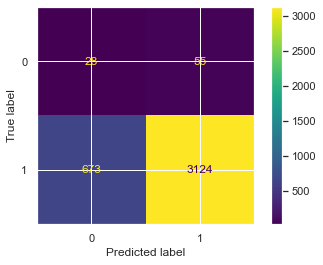

In [56]:
cm = confusion_matrix(y_test, svm_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

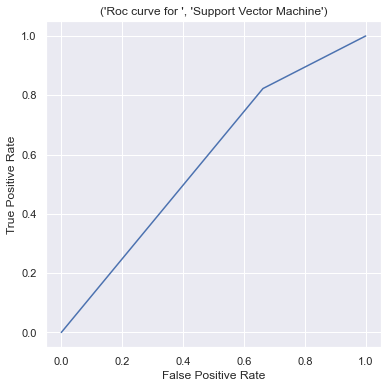

In [57]:
def plot_roc_curve(true_y, y_prob,model):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = "Roc curve for ",model
    plt.title(title)
plot_roc_curve(y_test,svm_pred,"Support Vector Machine")

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)
pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test,pred)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.11      0.02      0.04        83
           1       0.98      1.00      0.99      3797

    accuracy                           0.97      3880
   macro avg       0.55      0.51      0.51      3880
weighted avg       0.96      0.97      0.97      3880



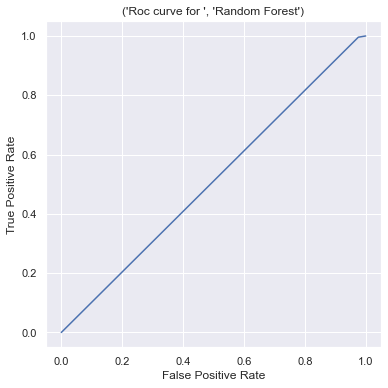

In [59]:
plot_roc_curve(y_test,pred,"Random Forest")

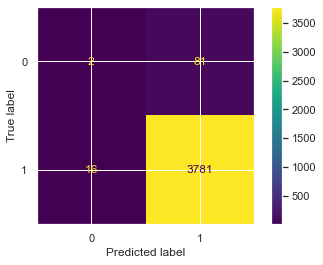

In [60]:
cm = confusion_matrix(y_test, pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [61]:
#Logistic regression model
lg = LogisticRegression()
lg.fit(X_train_smote, y_train_smote)
lg_pred = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test,lg_pred)
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.04      0.66      0.08        83
           1       0.99      0.67      0.80      3797

    accuracy                           0.67      3880
   macro avg       0.52      0.67      0.44      3880
weighted avg       0.97      0.67      0.79      3880



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


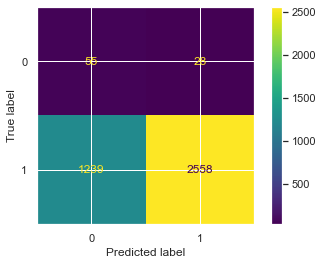

In [62]:
cm = confusion_matrix(y_test, lg_pred, labels=lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp.plot()
plt.show()

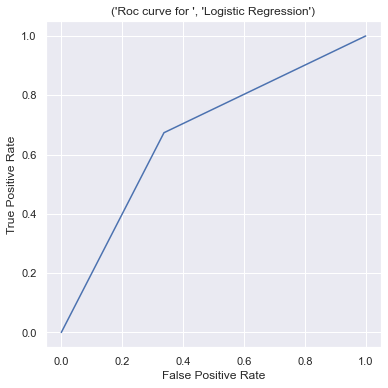

In [63]:
plot_roc_curve(y_test,lg_pred, "Logistic Regression")

In [69]:
accuracy = pd.DataFrame({"Models": ["Logistic Regression","SVM","Random Forest"],
                         "Accuracy_scores": [accuracy_score(y_test, lg_pred),
                                           accuracy_score(y_test, svm_pred),
                                           accuracy_score(y_test, pred)]})

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

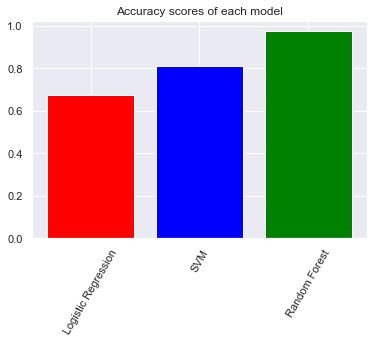

In [72]:
plt.title("Accuracy scores of each model")
plt.bar(accuracy["Models"],
        accuracy["Accuracy_scores"],
       color = ["red", "blue","green"])
plt.xticks(rotation=60)

In [73]:
MSE = pd.DataFrame({"Models": ["Logistic Regression","SVM","Random Forest"],
                         "MSE": [mean_squared_error(y_test, lg_pred),
                                           mean_squared_error(y_test, svm_pred),
                                           mean_squared_error(y_test, pred)]})
MSE

,Models,MSE
0,Logistic Regression,0.326546
1,SVM,0.187629
2,Random Forest,0.025000


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

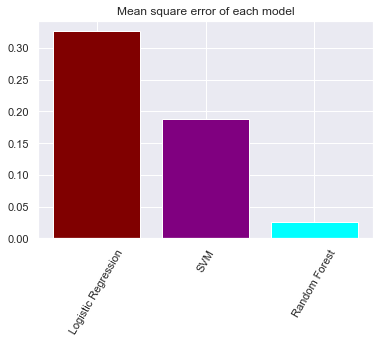

In [74]:
plt.title("Mean square error of each model")
plt.bar("Models",
        "MSE",
        data = MSE,
       color = ["maroon", "purple","cyan"])
plt.xticks(rotation=60)

SEX 0.08871498620756932
AGE 0.0676335133520965
BP 0.05253713857332836
INFARCTION 0.12090016270821155
FACE_DEFICIT 0.18230163639605876
ARM_DEFICIT 0.09968551731532702
LEG_DEFICIT 0.12009653219890092
DYSPHASIA 0.12188395587792834
HEMIANOPIA 0.054985271817892985
VS_DISORDER 0.048007524091521946
CEREBELLAR_SIGNS 0.04325376146116432


Text(0.5, 1.0, 'Effect of each variable on the Random Forest model')

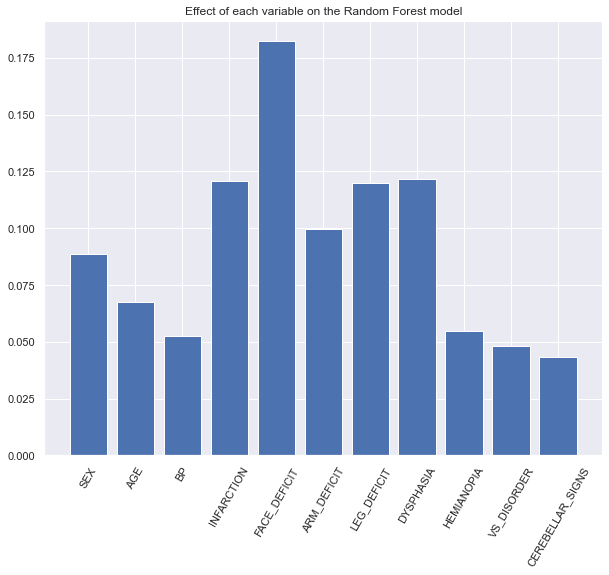

In [64]:
#The effect of the variables on the model
variables =[]
scores = []
for name, score in zip(X_train_smote, rfc.feature_importances_):
    print(name, score)
    variables.append(name)
    scores.append(score)
    
rfc_effect = pd.DataFrame({"Variables": variables,
                         "Effect" : scores})
plt.figure(figsize = (10,8))
plt.bar(rfc_effect["Variables"],
        rfc_effect["Effect"])
plt.xticks(rotation=60)
plt.title("Effect of each variable on the Random Forest model")